In [1]:
'''imports required'''

import math
import matplotlib.pyplot as plt

Task 1:

We want to create an array of N evenly-spaced, consecutive numbers between 0 and 1 that we can use to
plot a Gaussian distribution later. Write a function that takes an (integer) number N as input and returns an
array of size N containing the evenly-spaced, consecutive numbers between 0 and 1. Use a for-loop in the
function to create the array.
For instance if the user sets N = 5 and sends N to the function, it will return an array [0.00 0.25 0.50 0.75
1.00]
Compare your results with the built-in Matlab function “linspace” (See Matlab help on linspace). Are the
results the same? If not, what is the difference?

In [2]:
'''generating coordinate axis'''

N = input('Enter an integer value: ')
coord_axis = []

try:
    N = int(N)
except ValueError:
    raise ValueError('Please enter an integer value')

for i in range (N):
    coord_axis.append(i/(N-1))

print('Coordinate axis:', coord_axis)

Coordinate axis: [0.0, 0.00020004000800160032, 0.00040008001600320064, 0.000600120024004801, 0.0008001600320064013, 0.0010002000400080016, 0.001200240048009602, 0.0014002800560112022, 0.0016003200640128026, 0.0018003600720144029, 0.002000400080016003, 0.0022004400880176033, 0.002400480096019204, 0.002600520104020804, 0.0028005601120224045, 0.0030006001200240046, 0.003200640128025605, 0.0034006801360272052, 0.0036007201440288058, 0.003800760152030406, 0.004000800160032006, 0.004200840168033607, 0.004400880176035207, 0.004600920184036807, 0.004800960192038408, 0.005001000200040008, 0.005201040208041608, 0.0054010802160432084, 0.005601120224044809, 0.0058011602320464095, 0.006001200240048009, 0.00620124024804961, 0.00640128025605121, 0.006601320264052811, 0.0068013602720544105, 0.007001400280056011, 0.0072014402880576115, 0.007401480296059212, 0.007601520304060812, 0.007801560312062412, 0.008001600320064013, 0.008201640328065612, 0.008401680336067214, 0.008601720344068814, 0.0088017603520

Task 2:

Using the coordinate axis generated in the previous task, use a for-loop to create an array that stores the
value of a log-normal distribution function defined as follows:

$f_i = \frac{1}{x_i\sigma\sqrt{2\pi}}e^{-\frac{(ln(x_i-\mu))^2}{2\sigma^2}}$

In the above equation, $x_i$ is the ith element of the coordinate array generated in task 1, $f_i$ is the $i^{th}$ element
of the array containing the value of a log-normal distribution at the corresponding point $x_i$, and $\mu$ and $\sigma$ are
parameters of the distribution; use values of -0.530 and 0.136 for $\mu$ and $\sigma$, respectively.

In [3]:
'''generating normal distribution for coordinate axis'''

distrib_axis = []
sigma = 0.136
mu = -0.530

def normal_distribution(x_i, mu, sigma):
    normal_distib_output = (1/(x_i*sigma*math.sqrt(2*math.pi)))*math.exp(-0.5*((math.log(x_i)-mu)/sigma)**2)
    return normal_distib_output

for i in range(len(coord_axis)):
    x_i = coord_axis[i]
    if x_i == 0:
        distrib_axis.append(0)
    else:
        distrib_value = normal_distribution(x_i, mu, sigma)
        distrib_axis.append(distrib_value)

print('Normal distribution:', distrib_axis)

Normal distribution: [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.5614504e-317, 1.25426851808542e-309, 8.956266117263619e-303, 2.315281398387882e-296, 2.4245990230620176e-290, 1.1312736994463634e-284, 2.5507786830269624e-279, 2.9806166011128126e-274, 1.9175772262720906e-269, 7.160104748387063e-265, 1.6251066164462182e-260, 2.335224881344646e-256, 2.2025219850342433e-252, 1.4079383216806768e-248, 6.277060837571478e-245, 2.002574700550097e-241, 4.678573472759752e-238, 8.173125260245494e-235, 1.0879681630399875e-231, 1.1226629694341937e-228, 9.121704441313733e-226, 5.91965011968996e-223, 3.10875545123534e-220, 1.3370818668223727e-217, 4.762152212003079e-215, 1.4188634796686005e-212, 3.569859131473803e-210, 7.650882935026092e-208, 1.4080685836541329e-205, 2.2420236635455716e-203, 3.1101866667260507e-201, 3.783397819068969e-199, 4.0602988493880216e-197, 3.86610337137017e-195, 3.2834453153226433e-193, 2.4996760112232818e-191, 1.7137957328461456e-189, 1.062

Task 3:

Using the information from the attached slides and exercise session lecture generate a function that plots
the log-normal distribution function. The default MatLab plots are ugly, so we will set the properties of the
figure, axes and plot objects using structures and set statements as well as built in functions to make it look
nice. The plotting function should take the coordinate axis array, log-normal distribution array and two
property structures as inputs and return nothing.

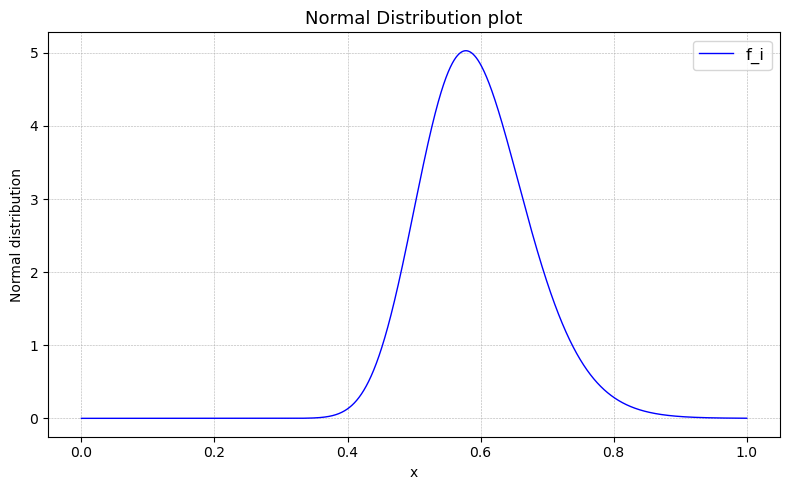

In [4]:
'''plotting'''

def harry_plotter(x_data, y_data):
    plt.figure(figsize=(8, 5))
    plt.plot(x_data, y_data, color='blue', linewidth=1, linestyle='-', marker=' ', markersize=3, label='f_i')  
    plt.xlabel('x', fontsize=10) 
    plt.ylabel('Normal distribution', fontsize=10)
    plt.title('Normal Distribution plot', fontsize=13)  
    plt.grid(visible=True, linestyle='--', linewidth=0.4) 
    plt.legend(loc='best', fontsize=12) 
    plt.tight_layout()
    plt.show()
    return None

harry_plotter(coord_axis, distrib_axis)

Task 4:

Use for-loops, if/then statements and/or while loops to find the following:

a) The array index, x value, and y value of the distribution’s peak.

b) The array index, x value, and y value of the distribution’s tailing edge.

c) The array index, x value, and y value of the distribution’s leading edge.

The leading and tailing edge of the distribution can be assumed to occur at the points where f(x) is less than
0.1% of the y value at the peak of the distribution.

a)

In [5]:
'''maximum finder'''

def max_finder(x_data, y_data):
    max = 0
    position = 0
    for i in range(len(y_data)):
        if y_data[i] > max:
            max = x_data[i]
            position = i
    return position, max

print(max_finder(coord_axis, distrib_axis))

(3765, 0.7531506301260252)


b)

In [6]:
'''tailing edge finder'''

def tailing_edge_finder(x_data, y_data,max_x, max_y):
    list = []
    for i in range (len(y_data)):
        if y_data[i] < max_y/1000 and x_data[i] > max_x:
            list.append(i) 
    if len(list) == 0:
        return 'No tailing edge found'
    else:
        tailing_edge_index = min(list)
        tailing_edge_data = [tailing_edge_index,
                              x_data[tailing_edge_index]
                              ,y_data[tailing_edge_index]] 
        return f'The tailing edge can be found at index {tailing_edge_data[0]}, x = {tailing_edge_data[1]} and y = {tailing_edge_data[2]}'

print(tailing_edge_finder(coord_axis, distrib_axis, max_finder(coord_axis, distrib_axis)[0], max_finder(coord_axis, distrib_axis)[1]))

No tailing edge found


c)

In [7]:
'''leading edge finder'''

def leading_edge_finder(x_data, y_data,max_x, max_y):
    list = []
    for i in range (len(y_data)):
        if y_data[i] < max_y/1000 and x_data[i] < max_x:
            list.append(i) 
    if len(list) == 0:
        return 'No leading edge found'
    else:
        leading_edge_index = max(list)
        tailing_edge_data = [leading_edge_index, x_data[leading_edge_index],y_data[leading_edge_index]]
    return f'The leading edge can be found at index {tailing_edge_data[0]}, x = {tailing_edge_data[1]} and y = {tailing_edge_data[2]}'

print(leading_edge_finder(coord_axis, distrib_axis, max_finder(coord_axis, distrib_axis)[0], max_finder(coord_axis, distrib_axis)[1]))

The leading edge can be found at index 1632, x = 0.3264652930586117 and y = 0.0007492574987488779
